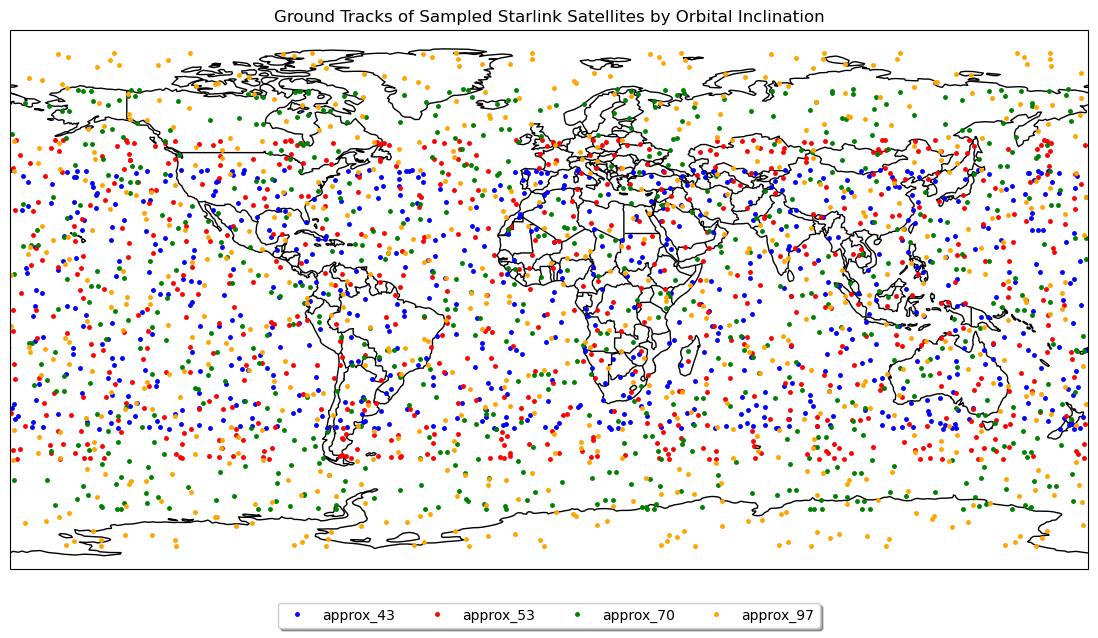

In [1]:
from skyfield.api import load
from math import degrees
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import random

# Load satellite data
stations_url = 'https://celestrak.org/NORAD/elements/gp.php?GROUP=starlink&FORMAT=tle'
satellites = load.tle_file(stations_url)

# Initialize figure
fig, ax = plt.subplots(figsize=(15, 7), subplot_kw={'projection': ccrs.PlateCarree()})

# Set up map projection with Cartopy
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.set_global()

# Define colors for each inclination category
colors = {
    "approx_43": 'blue',
    "approx_53": 'red',
    "approx_70": 'green',
    "approx_97": 'orange'
}

# Categorize satellites by inclination and plot their ground tracks
categorized_satellites = {
    "approx_43": [],
    "approx_53": [],
    "approx_70": [],
    "approx_97": [],
    "others": []
}

def get_orbital_inclination(satellite):
    return degrees(satellite.model.inclo)

for sat in satellites:
    inclination = get_orbital_inclination(sat)
    if 42 <= inclination <= 44:
        categorized_satellites["approx_43"].append(sat)
    elif 52 <= inclination <= 54:
        categorized_satellites["approx_53"].append(sat)
    elif 69 <= inclination <= 71:
        categorized_satellites["approx_70"].append(sat)
    elif 96 <= inclination <= 98:
        categorized_satellites["approx_97"].append(sat)
    else:
        categorized_satellites["others"].append(sat)

# Sample a subset of satellites from each category
sample_size = 5  # Define the number of satellites to sample from each category
sampled_satellites = {category: random.sample(sat_list, min(sample_size, len(sat_list)))
                      for category, sat_list in categorized_satellites.items()}

# Define a time span for plotting
ts = load.timescale()
t = ts.utc(2024, 6, 3, 0, range(0, 24*60, 10))  # 24 hours at 10-minute intervals

# Plot the ground tracks
labels_plotted = set()

for category, satellites in sampled_satellites.items():
    color = colors.get(category, 'gray')
    for sat in satellites:
        geocentric = sat.at(t)
        subpoint = geocentric.subpoint()
        x = subpoint.longitude.degrees
        y = subpoint.latitude.degrees
        label = category if category not in labels_plotted else ""
        ax.plot(x, y, '.', markersize=5, color=color, label=label)  # Increased markersize
        labels_plotted.add(category)

# Add legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=15)

plt.title('Ground Tracks of Sampled Starlink Satellites by Orbital Inclination')
plt.show()


Loaded 6087 satellites
Number of satellites with approx 43 degrees inclination: 2049
NORAD IDs: [54820, 54821, 54822, 54823, 54824, 54825, 54826, 54827, 54828, 54829, 54830, 54831, 54832, 54833, 54834, 54835, 54836, 54837, 54838, 54839, 54840, 54841, 54842, 54843, 54844, 54845, 54846, 54847, 54848, 54849, 54850, 54851, 54852, 54853, 54854, 54855, 54856, 54857, 54858, 54859, 54860, 54861, 54862, 54863, 54864, 54865, 54866, 54867, 54868, 54869, 54870, 54871, 54872, 54873, 55331, 55332, 55333, 55334, 55335, 55336, 55337, 55338, 55339, 55340, 55341, 55342, 55343, 55344, 55345, 55346, 55347, 55348, 55349, 55350, 55351, 55352, 55353, 55354, 55355, 55357, 55358, 55359, 55360, 55361, 55362, 55363, 55364, 55365, 55366, 55367, 55368, 55369, 55370, 55371, 55372, 55373, 55374, 55375, 55376, 55377, 55378, 55379, 55380, 55381, 55382, 55383, 55384, 55385, 55386, 55449, 55450, 55451, 55452, 55453, 55454, 55455, 55456, 55457, 55458, 55459, 55460, 55461, 55462, 55463, 55464, 55465, 55466, 55467, 55468, 

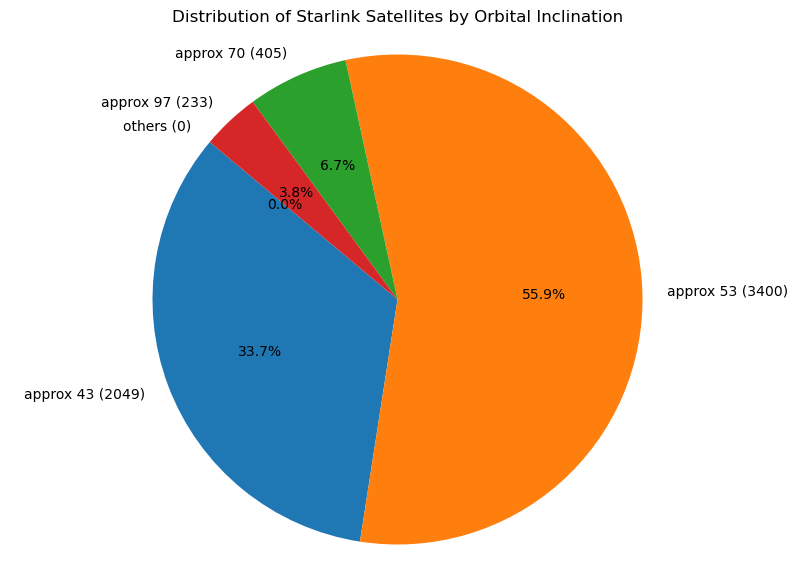

In [2]:
from skyfield.api import load
from math import degrees
import matplotlib.pyplot as plt

def load_data():
    stations_url = 'https://celestrak.org/NORAD/elements/gp.php?GROUP=starlink&FORMAT=tle'
    satellites = load.tle_file(stations_url)
    print('Loaded', len(satellites), 'satellites')
    return satellites

def get_orbital_inclination(satellite):
    return degrees(satellite.model.inclo)

def get_norad_id(satellite):
    return satellite.model.satnum

def categorize_by_inclination(satellites):
    categories = {
        "approx_43": [],
        "approx_53": [],
        "approx_70": [],
        "approx_97": [],
        "others": []
    }
    
    for sat in satellites:
        inclination = get_orbital_inclination(sat)
        norad_id = get_norad_id(sat)
        if 42 <= inclination <= 44:
            categories["approx_43"].append(norad_id)
        elif 52 <= inclination <= 54:
            categories["approx_53"].append(norad_id)
        elif 69 <= inclination <= 71:
            categories["approx_70"].append(norad_id)
        elif 96 <= inclination <= 98:
            categories["approx_97"].append(norad_id)
        else:
            categories["others"].append(norad_id)
    
    return categories

def calculate_id_statistics(categorized_inclinations):
    id_stats = {}
    
    for category, ids in categorized_inclinations.items():
        if ids:
            min_id = min(ids)
            max_id = max(ids)
            id_stats[category] = {
                'min': min_id,
                'max': max_id
            }
        else:
            id_stats[category] = {
                'min': None,
                'max': None
            }
    
    return id_stats

def plot_pie_chart(categorized_inclinations):
    labels = []
    sizes = []

    for category, inclinations in categorized_inclinations.items():
        labels.append(category.replace('_', ' ') + f' ({len(inclinations)})')
        sizes.append(len(inclinations))

    plt.figure(figsize=(10, 7))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Distribution of Starlink Satellites by Orbital Inclination')
    plt.show()

if __name__ == "__main__":
    satellites = load_data()
    
    categorized_inclinations = categorize_by_inclination(satellites)
    id_statistics = calculate_id_statistics(categorized_inclinations)
    
    for category, ids in categorized_inclinations.items():
        print(f"Number of satellites with {category.replace('_', ' ')} degrees inclination: {len(ids)}")
        print(f"NORAD IDs: {ids}\n")
    
    for category, stats in id_statistics.items():
        print(f"NORAD ID statistics for {category.replace('_', ' ')} degrees inclination:")
        print(f"  Min NORAD ID: {stats['min']}")
        print(f"  Max NORAD ID: {stats['max']}\n")
    
    plot_pie_chart(categorized_inclinations)


Loaded 6087 satellites
Number of ISL-capable satellites: 5333
Number of non-ISL-capable satellites: 754


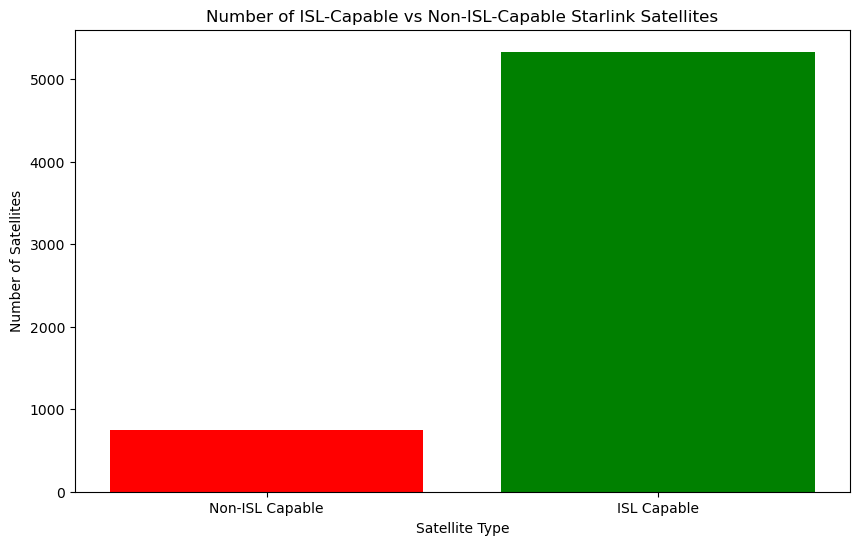

In [3]:
from skyfield.api import load
import matplotlib.pyplot as plt

def load_data():
    stations_url = 'https://celestrak.org/NORAD/elements/gp.php?GROUP=starlink&FORMAT=tle'
    satellites = load.tle_file(stations_url)
    print('Loaded', len(satellites), 'satellites')
    return satellites

def get_catalog_number(satellite):
    return int(satellite.model.satnum)

def categorize_satellites(satellites, cutoff_catalog_number):
    before_cutoff = 0
    after_cutoff = 0
    
    for sat in satellites:
        catalog_number = get_catalog_number(sat)
        if catalog_number < cutoff_catalog_number:
            before_cutoff += 1
        else:
            after_cutoff += 1
    
    return before_cutoff, after_cutoff

def plot_bar_chart(non_isl_capable, isl_capable):
    categories = ['Non-ISL Capable', 'ISL Capable']
    counts = [non_isl_capable, isl_capable]

    plt.figure(figsize=(10, 6))
    plt.bar(categories, counts, color=['red', 'green'])
    plt.xlabel('Satellite Type')
    plt.ylabel('Number of Satellites')
    plt.title('Number of ISL-Capable vs Non-ISL-Capable Starlink Satellites')
    plt.show()

if __name__ == "__main__":
    satellites = load_data()
    cutoff_catalog_number = 47413  # Example cutoff for June 2021
    
    non_isl_capable, isl_capable = categorize_satellites(satellites, cutoff_catalog_number)
    
    print(f"Number of ISL-capable satellites: {isl_capable}")
    print(f"Number of non-ISL-capable satellites: {non_isl_capable}")

    plot_bar_chart(non_isl_capable, isl_capable)


Execution time: 2024-06-27 22:12:29 UTC

43 deg catalog #59944 epoch 2024-06-10 14:00:01 UTC
53 deg catalog #59772 epoch 2024-06-10 14:00:01 UTC
70 deg catalog #56818 epoch 2024-06-10 09:25:17 UTC
96 deg catalog #56361 epoch 2024-06-10 13:15:45 UTC


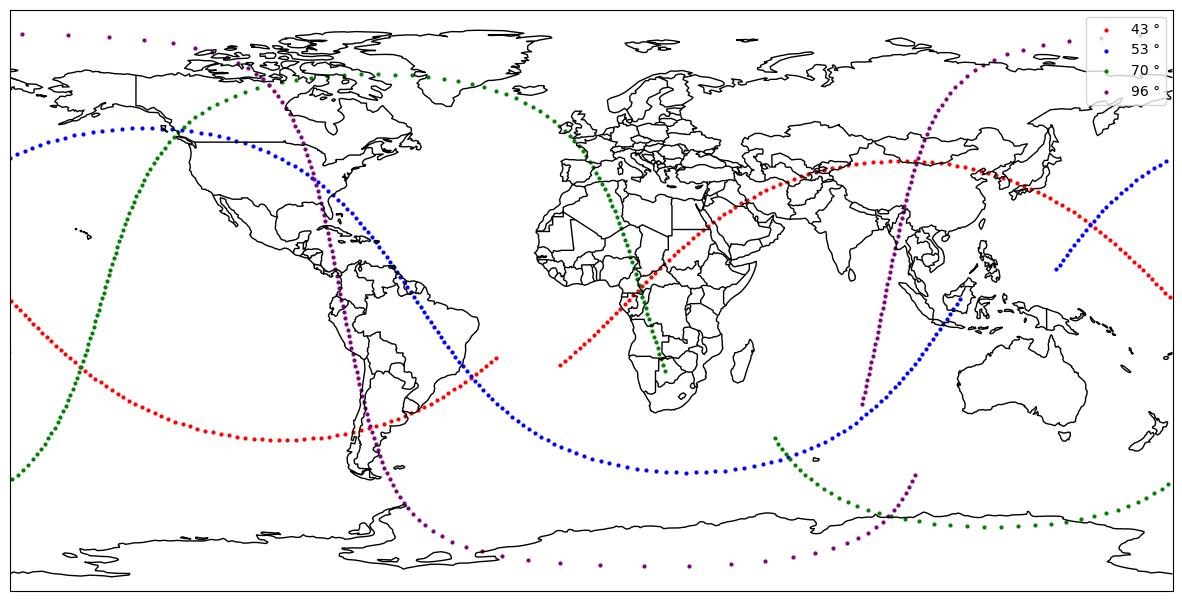

In [7]:
import pytz
from datetime import datetime
from dateutil.relativedelta import relativedelta
from skyfield.api import load, wgs84, EarthSatellite
import matplotlib.pyplot as plt
import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Set the PROJ_LIB environment variable
os.environ['PROJ_LIB'] = r'c:\Users\ALI\anaconda3\Library\share'

# Load the timescale
ts = load.timescale()

# Two-line elements for the satellites
satellites_tle = {
    '43 deg': ('1 59944U 24106Y   24162.58334491 -.00963328  00000+0 -37177-2 0  9995',
             '2 59944  43.0028   7.3747 0001617 276.1593   4.7933 15.88512240  2729'),
    '53 deg': ('1 59772U 24091V   24162.58334491 -.00028397  00000+0 -50431-3 0  9994',
             '2 59772  53.1592 109.3201 0001668 135.4646 326.3293 15.49310214  5220'),
    '70 deg': ('1 56818U 23078BD  24162.39255501  .00000742  00000+0  69963-4 0  9992',
             '2 56818  69.9988 151.1312 0003105 269.1876  90.8927 14.98333779 57912'),
    '96 deg': ('1 56361U 23058AW  24162.55259949  .00001496  00000+0  12105-3 0  9993',
               '2 56361  97.6560 163.5634 0001888  93.1962 266.9478 15.01258260 62054')
}

# Colors for the satellites
colors = ['red', 'blue', 'green', 'purple']

# Create the ground track map with a larger figure
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.set_global()

# Set the timezone
tz = pytz.timezone('UTC')

# Get the current time
dt = tz.localize(datetime.utcnow())
print(f"Execution time: {dt:%Y-%m-%d %H:%M:%S %Z}\n")

# Process each satellite
for (name, (line1, line2)), color in zip(satellites_tle.items(), colors):
    satellite = EarthSatellite(line1, line2, name, ts)
    print(satellite)

    # Split the next 200 minutes into a collection of 101 evenly spaced timescales
    t0 = ts.utc(dt)
    t1 = ts.utc(dt + relativedelta(minutes=90))
    timescales = ts.linspace(t0, t1, 181)

    # Calculate the subpoints
    geocentrics = satellite.at(timescales)
    subpoints = wgs84.subpoint_of(geocentrics)

    # Kludge to split each crossing of the east edge of the map into its own set
    # of track coordinates to route around ax.plot rejecting the full
    # coordinate set on a cylindrical projection. This code won't work for a
    # westward ground track!
    coordinates = zip(subpoints.longitude.degrees, subpoints.latitude.degrees)
    ground_tracks = []
    prev_lon = 999
    for lon, lat in coordinates:
        if lon < prev_lon:
            ground_tracks.append(([], []))
        track_lons, track_lats = ground_tracks[-1]
        track_lons.append(lon)
        track_lats.append(lat)
        prev_lon = lon

    # Plot the individual ground tracks as scatter points
    for track in ground_tracks:
        ax.scatter(track[0], track[1], color=color, s=4, label=name if track == ground_tracks[0] else "")

# Add legend with circular symbols
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, [label.replace('deg', '°') for label in labels], loc='upper right')

# Show the plot
plt.savefig('info2.png')
plt.show()
